In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
oliv=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [7]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [9]:
oliv['data'].shape

(400, 4096)

In [10]:
oliv['images'].shape

(400, 64, 64)

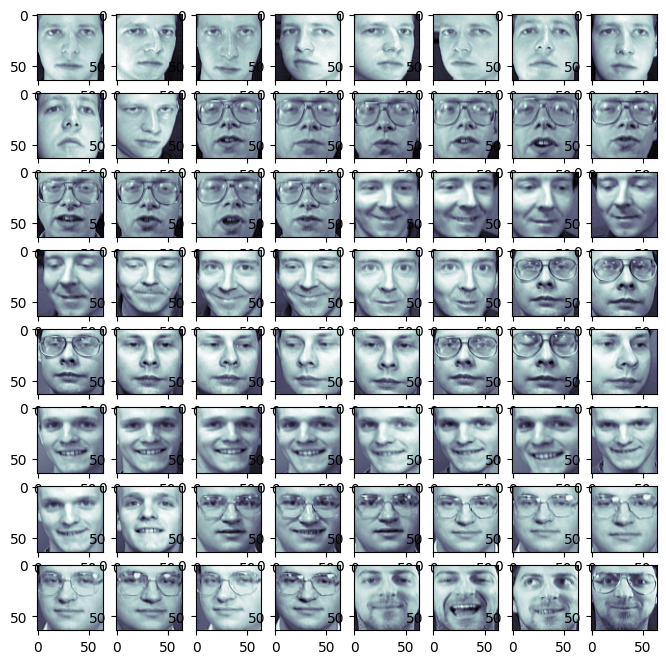

In [14]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [18]:
x=oliv.data
y=oliv.target

In [19]:
pca = PCA()
pca.fit(x)

PCA()

In [21]:
pca.components_.shape

(400, 4096)

In [26]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.95:
  currentSum+=pca.explained_variance_[k]
  k=k+1
k

123

In [35]:
pca =PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [37]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [38]:
x_approx_images=x_approx.reshape([400,64,64])

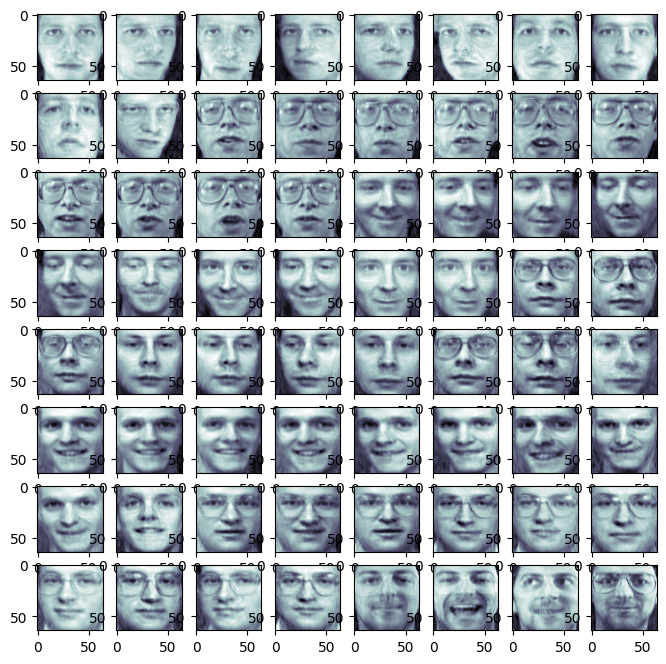

In [42]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()